Atributo con mayor correlación lineal con el target: MedInc
Valor de correlación: 0.6880752079585484


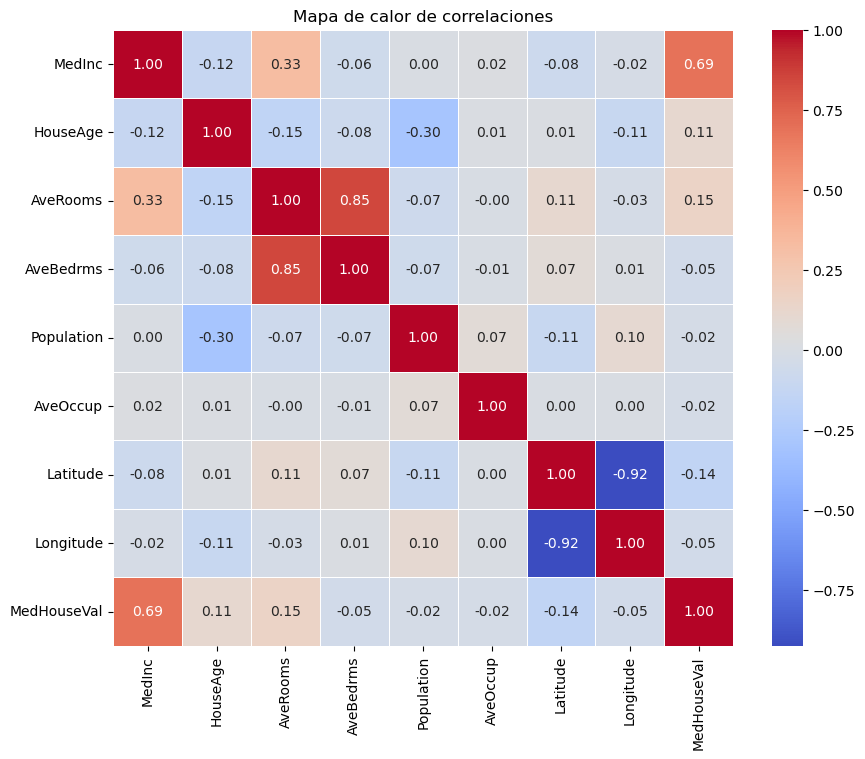

In [170]:
# ---------------------------------------------------
"""
 1) Obtener la correlación entre los atributos y los atributos con el target. 
    ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? 
    Se puede obtener los valores o directamente graficar usando un mapa de calor.

    RESPUESTA: 
    A partir del grafico de calor mas abajo vemos que:
    - El atributo con mayor correlacion lineal con el target es: "MedInc". El ingreso medio ("MedInc") está altamente correlacionado con nuestro valor objetivo ("MedHouseVal"), 
    lo que indica que esta variable tendrá el papel más importante.
    - La latitud ("Latitude") y la longitud ("Longitude") están correlacionadas negativamente.  Esto significa que, a medida que una de estas variables aumenta, 
    la otra tiende a disminuir. En términos geográficos, esto refleja cómo está distribuido el estado de California (es mas alargado que ancho) y "podriamos" presumir
    que las casas mas caras estan sobre la costa y estan distribuidas a lo largo (Longitud) del estado. En este punto esto es solo una conjetura inicial y no una conclusion final.
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Cargar el dataset
california_housing = fetch_california_housing(as_frame=True)
# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_california.corr()

# Identificar el atributo más correlacionado con el target ("MedHouseVal")
target_corr = correlation_matrix["MedHouseVal"].drop("MedHouseVal").sort_values(ascending=False)
most_correlated = target_corr.idxmax()

print("Atributo con mayor correlación lineal con el target:", most_correlated)
print("Valor de correlación:", target_corr[most_correlated])

# Graficar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


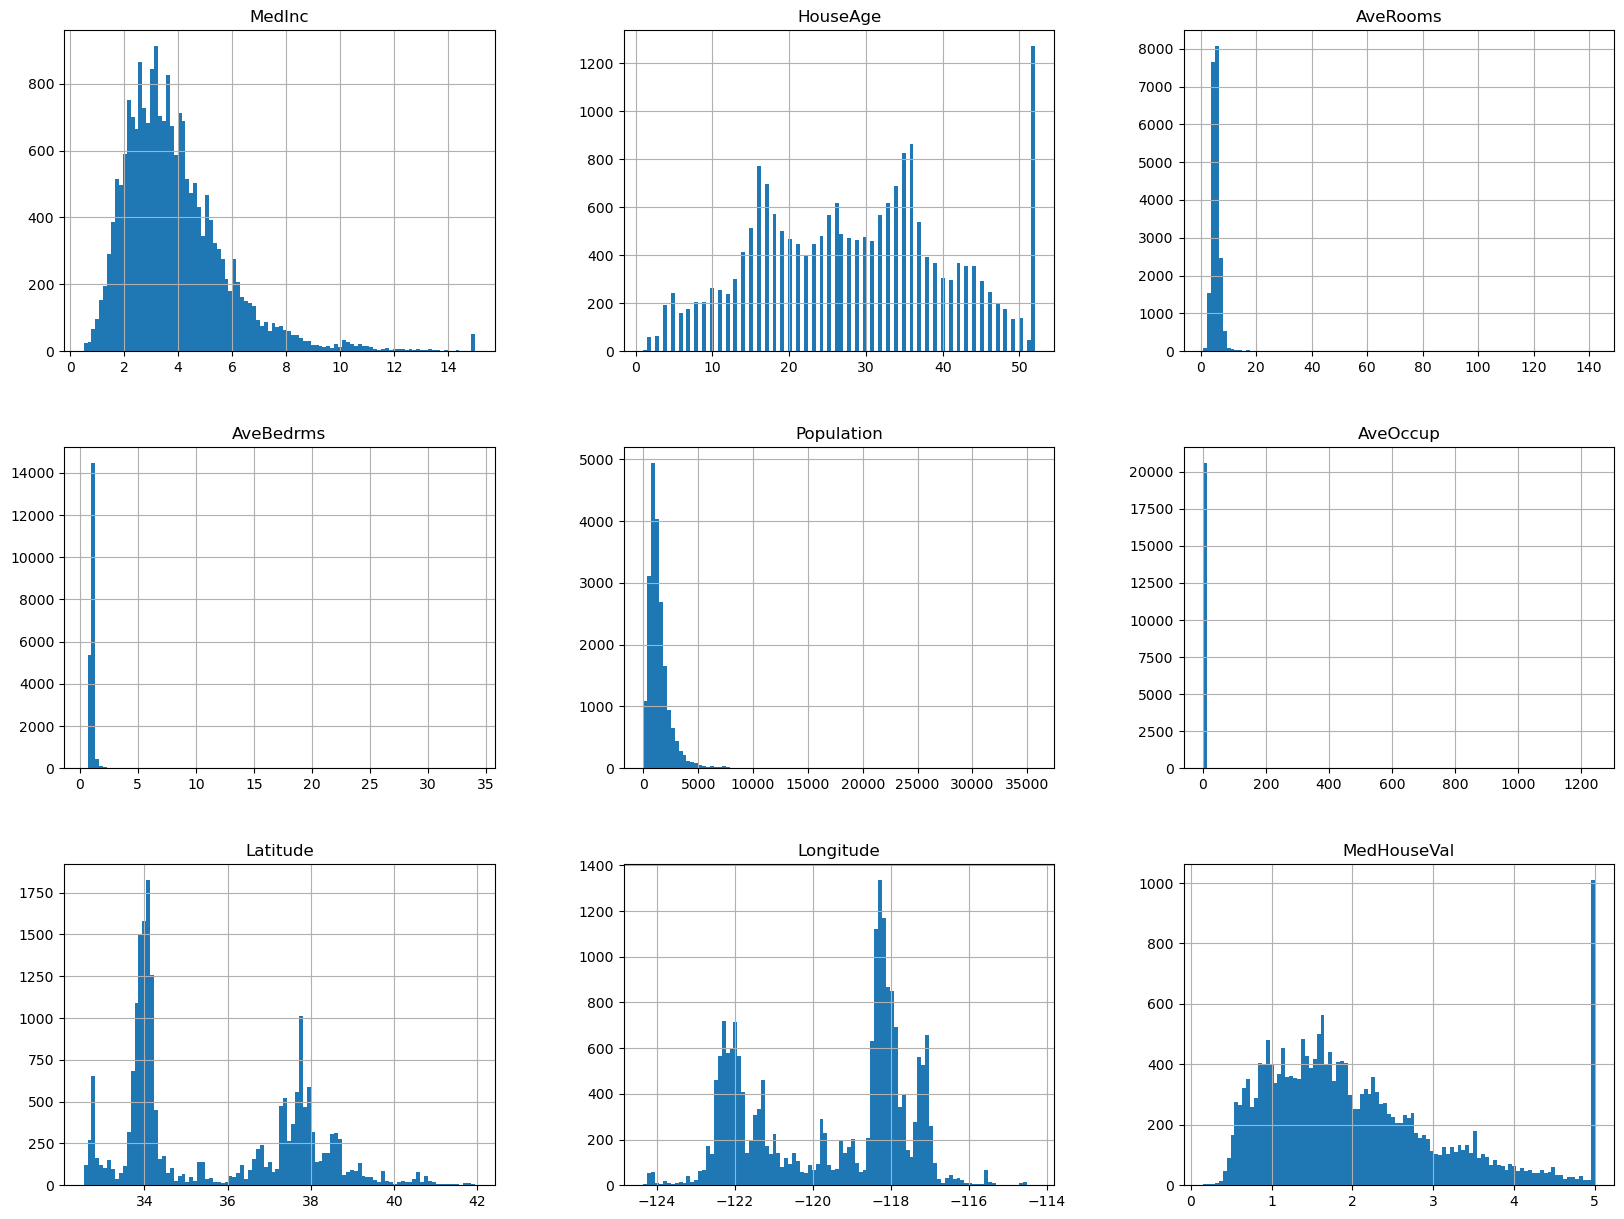

In [171]:
# ---------------------------------------------------
"""
2) Graficar los histogramas de los diferentes atributos y el target. 
¿Qué tipo de forma de histograma se observa? 
¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

RESPUESTA:
- El ingreso medio (`MedInc`) tiene una distribución con una cola larga. Esto significa que los salarios de las personas están distribuidos de manera más o menos normal, 
pero hay algunas personas que reciben salarios altos.
- En cuanto a la antigüedad promedio de las casas (`HouseAge`), la distribución es más o menos uniforme.
- La distribución del objetivo (`MedHouseVal`) también tiene una cola larga. 
- Enfocándonos en el promedio de habitaciones, el promedio de dormitorios, la ocupación promedio y la población, el rango de los datos es amplio, 
con intervalos casi imperceptibles para los valores más altos. 
Esto significa que hay valores muy elevados y poco frecuentes (¿quizás podrían considerarse como valores atípicos (outliers)?). 
"""

df_california.hist(bins=100, figsize=(20,15));


In [172]:
# ---------------------------------------------------
"""
3) Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. 
- ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

RESPUESTA
- La varianza total representa la variabilidad total en los precios de las viviendas
    Varianza total: 1.312
- La varianza explicada es la parte que nuestro modelo logra capturar
    Varianza explicada: 0.781
- La varianza residual es lo que el modelo no puede explicar
    Varianza del error: 0.530    

El modelo captura más de la mitad de la variabilidad. Sin embargo, hay un 40% de la variabilidad que no logra explicar
Ejemplo:
    Si tenemos una casa con precio real de $500,000
    Y nuestro modelo predice $450,000
    Esta diferencia de $50,000 forma parte de ese 40% de variabilidad no explicada
    
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Se separa el dataset en entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

# Inicializar el modelo de LinearRegression
lr_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr_model.fit(X_train_scaled, y_train)

# Predecir los valores del conjunto de prueba
lr_y_pred = lr_model.predict(X_test_scaled)

# Calcular varianzas
# Varianza total del target - La varianza total representa la variabilidad total en los precios de las viviendas
total_variance = np.var(y_test)
# Varianza del error (residuos) - La varianza residual es lo que el modelo no puede explicar
residual_variance = np.var(y_test - lr_y_pred)
# Varianza explicada - La varianza explicada es la parte que nuestro modelo logra capturar
explained_variance = total_variance - residual_variance

print(f"Varianza total: {total_variance}")
print(f"Varianza del error: {residual_variance}")
print(f"Varianza explicada: {explained_variance}")



Varianza total: 1.3125401078138632
Varianza del error: 0.530566187141439
Varianza explicada: 0.7819739206724242


In [173]:
"""
4) Calcular las métricas de MSE, MAE y R2 del set de evaluación.

RESPUESTA:
- `Error cuadrático medio (MSE)`: 0.53
    El MSE nos muestra el promedio de los errores al cuadrado
- `R² Score` (varianza total): 0.595
    Valor cercano a 0.6 indica que el modelo explica aproximadamente el 60% de la variabilidad en los precios.
    Este valor sugiere un rendimiento moderado del modelo.
    Hay un 40% de la variabilidad que el modelo no logra capturar.
- MAE (Error absoluto medio): 0.527
    Nos muestra el error promedio en términos absolutos.
    Es más interpretable que el MSE ya que está en las mismas unidades que el target.
    Un MAE alto en relación con la media del target indica que las predicciones tienen una desviación considerable.
"""
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular las métricas de MSE, MAE y R2 del set de evaluación.
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)

print(f"LinearRegression: Mean Squared Error: {lr_mse}")
print(f"LinearRegression: R2 Score: {lr_r2}")
print(f"LinearRegression: MAE error: {lr_mae}")

LinearRegression: Mean Squared Error: 0.5305677824766752
LinearRegression: R2 Score: 0.5957702326061664
LinearRegression: MAE error: 0.5272474538305956



Mejor valor de α: 6.56566
MSE mínimo: 0.5268


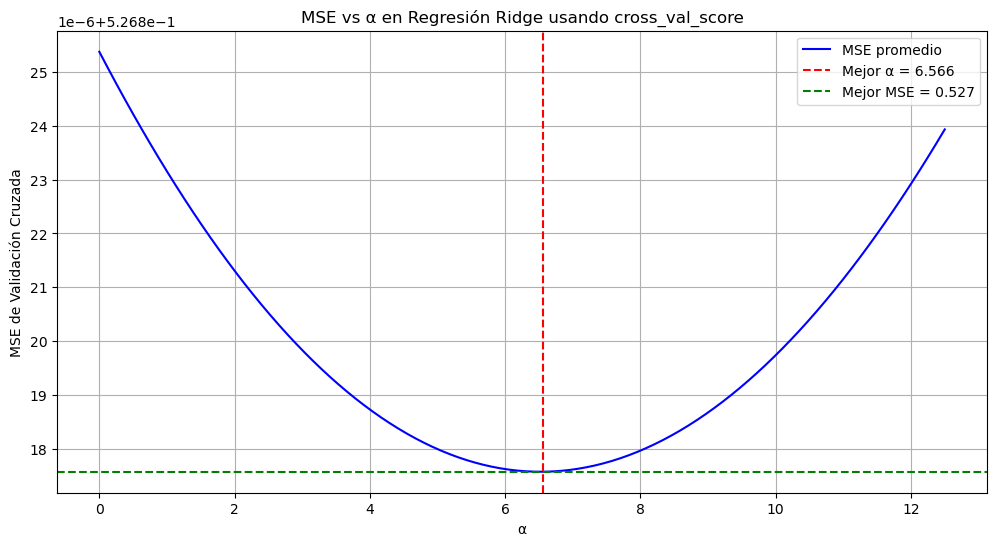

In [174]:
# ---------------------------------------------------
"""
5) Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, 
calcular el mejor valor de α, buscando entre [0, 12.5]. 
Graficar el valor de MSE versus α

RESPUESTA:
    Mejor valor de α: 0.00000
    MSE mínimo: 0.5268
"""

# Creamos un modelo
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Definir valores de alpha a probar
alphas = np.linspace(0, 12.5, 100)

# Arrays para almacenar resultados
mse_scores = []
mse_std = []

# Para cada valor de alpha
for alpha in alphas:
    # Crear modelo Ridge
    ridge_model = Ridge(alpha=alpha)
    
    # Calcular MSE usando cross_val_score
    # Nota: usamos el negativo del MSE porque cross_val_score maximiza la métrica
    cv_scores = -cross_val_score(ridge_model, X_train_scaled, y=y_train, 
                            scoring='neg_mean_squared_error',
                            cv=5,
                            n_jobs=-1)
    
    # Guardar media y desviación estándar
    mse_scores.append(cv_scores.mean())
    mse_std.append(cv_scores.std())

# Convertir a arrays de numpy
mse_scores = np.array(mse_scores)
mse_std = np.array(mse_std)

# Encontrar el mejor alpha
best_alpha_idx = np.argmin(mse_scores)
best_alpha = alphas[best_alpha_idx]
best_mse = mse_scores[best_alpha_idx]

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.plot(alphas, mse_scores, 'b-', label='MSE promedio')

plt.axvline(best_alpha, color='r', linestyle='--', 
            label=f'Mejor α = {best_alpha:.3f}')
plt.axhline(best_mse, color='g', linestyle='--', 
            label=f'Mejor MSE = {best_mse:.3f}')

plt.xlabel('α')
plt.ylabel('MSE de Validación Cruzada')
plt.title('MSE vs α en Regresión Ridge usando cross_val_score')
plt.legend()
plt.grid(True)

# Imprimir resultados
print(f"\nMejor valor de α: {best_alpha:.5f}")
print(f"MSE mínimo: {best_mse:.4f}")


Comparación de Métricas en Set de Evaluación:

Regresión Lineal:
MSE: 0.5306
MAE: 0.5272

Regresión Ridge:
MSE: 0.5304
MAE: 0.5272

Comparación de Coeficientes:
      Feature  Linear Coef  Ridge Coef  Abs Difference
7   Longitude    -0.868617   -0.862975        0.005642
6    Latitude    -0.893856   -0.888293        0.005562
3   AveBedrms     0.348410    0.346397        0.002012
2    AveRooms    -0.299558   -0.297923        0.001635
1    HouseAge     0.122119    0.122700        0.000581
0      MedInc     0.849222    0.848762        0.000460
4  Population    -0.000884   -0.000687        0.000198
5    AveOccup    -0.041698   -0.041726        0.000028


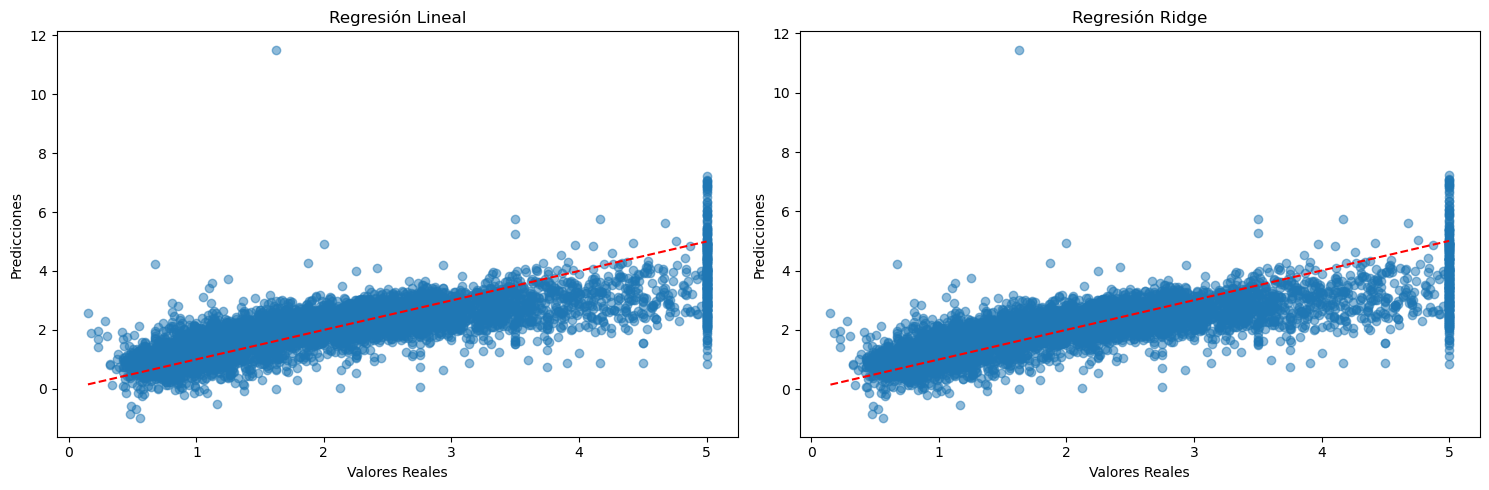

In [ ]:
# ---------------------------------------------------
"""
6) Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

RESPUESTA:

- Comparación de Métricas:
    La regresión Ridge muestra una pequeña mejora en MSE: 0.5304 cuando utilizamos le mejor alpha= 6.565666
"""

# Entrenar modelos
ridge_reg = Ridge(alpha= 6.565666)  # usando el mejor alpha encontrado anteriormente
ridge_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Calcular métricas
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Imprimir resultados
print("Comparación de Métricas en Set de Evaluación:")
print("\nRegresión Lineal:")
print(f"MSE: {lr_mse:.4f}")
print(f"MAE: {lr_mae:.4f}")
print("\nRegresión Ridge:")
print(f"MSE: {mse_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")

# Comparar coeficientes
coef_comparison = pd.DataFrame({
    'Feature': california_housing.feature_names,
    'Linear Coef': lr_model.coef_,
    'Ridge Coef': ridge_reg.coef_,
    'Abs Difference': np.abs(lr_model.coef_ - ridge_reg.coef_)
})

print("\nComparación de Coeficientes:")
print(coef_comparison.sort_values(by='Abs Difference', ascending=False))

# Visualización de predicciones vs valores reales
plt.figure(figsize=(15, 5))

# Subplot para Regresión Lineal
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal')

# Subplot para Regresión Ridge
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Ridge')

plt.tight_layout()
plt.show()
